In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

df = pd.read_csv('D:/AWIS/Semester_03/SFP/Webscraper_Autoscout/SFP_Workspace/car_data_csv.csv',sep=';')

df.describe(include='all')
# df.dtypes


,Verbrauch,Hersteller,CO₂-Emissionen2,Fahrzeughalter,Schadstoffklasse,Barzahlungspreis,Sitzplätze,Türen,Kilometerstand,Erstzulassung,HU,Leistung,Getriebe,Kraftstoff,Außenfarbe
count,504.000000,504,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504,504,504
unique,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,15
top,NaN,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Schaltgetriebe,Benzin,Schwarz
freq,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355,365,134
mean,6.413889,NaN,154.984127,1.912698,4.988095,10499.734127,4.861111,4.666667,117919.289683,11.202381,18.861111,98.456349,NaN,NaN,NaN
std,1.923984,NaN,47.863164,0.913951,0.928806,3994.871660,0.805397,0.746097,71024.089473,5.867211,7.804301,36.156580,NaN,NaN,NaN
min,3.000000,NaN,0.000000,1.000000,3.000000,1100.000000,2.000000,3.000000,10.000000,0.000000,0.000000,37.000000,NaN,NaN,NaN
25%,5.100000,NaN,120.000000,1.000000,4.000000,7497.500000,5.000000,5.000000,68000.000000,6.000000,15.000000,74.000000,NaN,NaN,NaN
50%,5.900000,NaN,140.000000,2.000000,5.000000,11890.000000,5.000000,5.000000,107250.000000,10.500000,24.000000,92.000000,NaN,NaN,NaN
75%,7.400000,NaN,178.250000,2.000000,6.000000,13980.000000,5.000000,5.000000,151821.000000,16.000000,24.000000,115.000000,NaN,NaN,NaN


In [ ]:
bins = [0, 80, 120, 200, 250, 320] 
labels=["sehr gering","gering","moderat","hoch","sehr hoch"]
df['CO₂-Emissionen2'] = pd.cut(df['CO₂-Emissionen2'], bins)

In [ ]:
bins = [0, 2, 4, 6, 8, 10, 12, 14]
labels  = ["A","B","C","D","E","F","G"]
df['Verbrauch'] = pd.cut(df['Verbrauch'], bins = bins)

In [ ]:
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]
labels = ['A', 'B', 'C', 'D', 'E' , 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
df['Barzahlungspreis'] = pd.cut(df['Barzahlungspreis'], bins = bins)

In [ ]:
bins = [0, 2500, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 125000, 150000, 175000, 200000, 250000, 300000, 600000]
labels = ['A', 'B', 'C', 'D', 'E' , 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O','P','Q','R','S']
df['Kilometerstand'] = pd.cut(df['Kilometerstand'], bins = bins)

In [ ]:
bins = [0, 50, 100, 150, 200, 250, 300, 350]
labels = ['A', 'B', 'C', 'D', 'E' , 'F', 'G']
df['Leistung'] = pd.cut(df['Leistung'], bins = bins)

In [ ]:
bins = [0, 5, 10, 15, 20, 25]
# labels = ['1', '2', '3', '4', '5']
df['Erstzulassung'] = pd.cut(df['Erstzulassung'], bins = bins)

In [ ]:
bins = [-20, 3, 6, 9, 12, 15, 18, 21, 31]
labels = ['1Q', '2Q', '3Q', '4Q', '5Q', '6Q', '7Q', '8Q']
df["HU"] = pd.cut(df['HU'], bins = bins, labels = labels)

In [30]:
bins = [0, 5, 11, 17, 23]
df["Erstzulassung"] = pd.cut(df['Erstzulassung'], bins = bins)

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.describe(include='all')
#Top CO2 bestätigt statista Auswertung

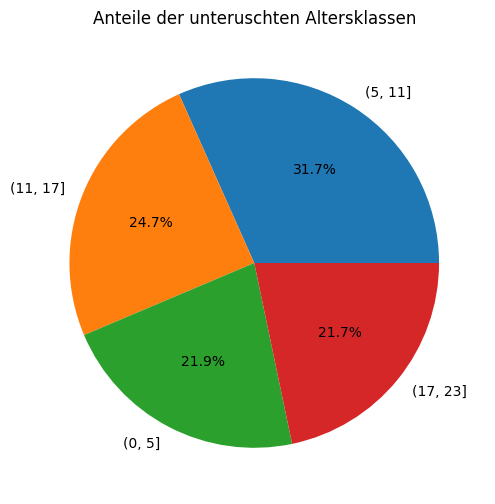

In [31]:
values = df['Erstzulassung'].value_counts()
labels = values.index

plt.figure(figsize=(10,6))
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.title('Anteile der unteruschten Altersklassen')
plt.show()

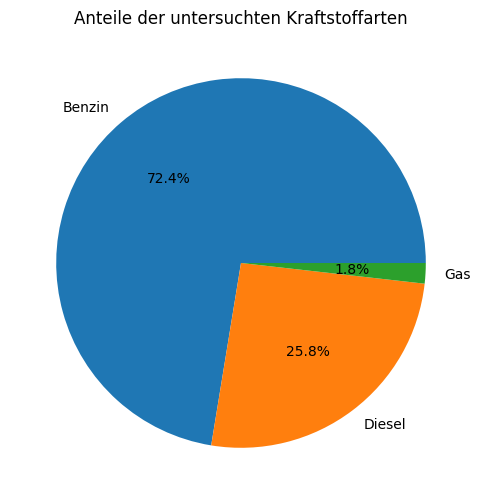

In [28]:
values = df['Kraftstoff'].value_counts()
labels = values.index

plt.figure(figsize=(10,6))
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.title('Anteile der untersuchten Kraftstoffarten')
plt.show()

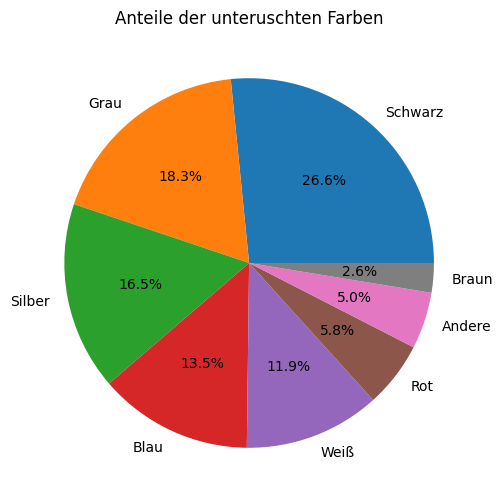

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate value counts
counts = df['Außenfarbe'].value_counts()

# Calculate percentages
percentages = counts / counts.sum() * 100

# Identify labels with less than 2.5%
other_labels = percentages[percentages < 2.5].index

# Replace these labels in the original DataFrame
df['Außenfarbe'] = df['Außenfarbe'].replace(other_labels, 'Andere')

# Recalculate the value counts
new_counts = df['Außenfarbe'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10,6))
plt.pie(new_counts, labels = new_counts.index, autopct='%1.1f%%')
plt.title('Anteile der unteruschten Farben')
plt.show()


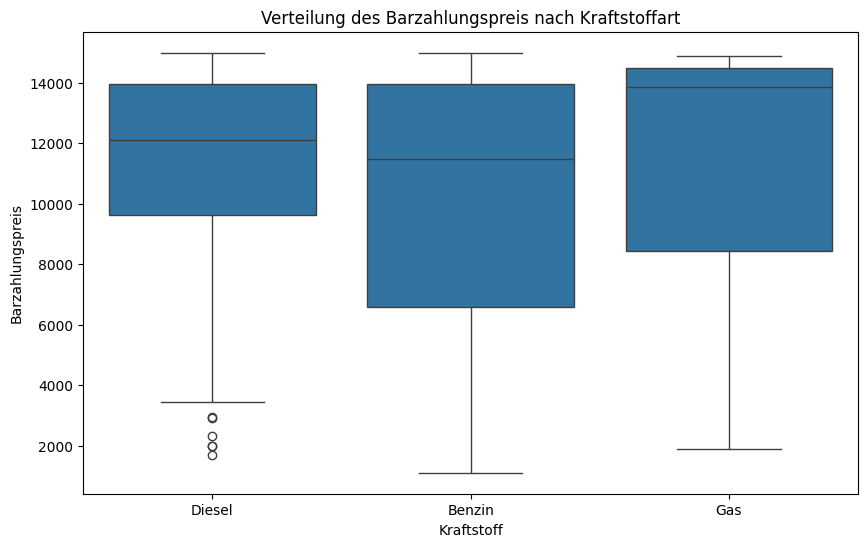

Kraftstoff
Benzin    10213.304110
Diesel    11239.923077
Gas       11424.444444
Name: Barzahlungspreis, dtype: float64


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot erstellen
plt.figure(figsize=(10,6))
sns.boxplot(x='Kraftstoff', y='Barzahlungspreis', data=df)
plt.title('Verteilung des Barzahlungspreis nach Kraftstoffart')
plt.show()

# Durchschnittlichen Barzahlungspreis für jede Kraftstoffart berechnen
average_prices = df.groupby('Kraftstoff')['Barzahlungspreis'].mean().sort_values()
print(average_prices)

Da "Kraftstoff" eine kategoriale Variable und "Barzahlungspreis" eine kontinuierliche Variable ist, können Sie den ANOVA (Analysis of Variance) Test verwenden, um den Zusammenhang zwischen diesen beiden Variablen zu überprüfen. Der ANOVA-Test prüft die Hypothese, dass die Mittelwerte von mehr als zwei Gruppen gleich sind.

Die F-Statistik gibt an, wie stark die Gruppen voneinander abweichen, und der P-Wert gibt die Wahrscheinlichkeit an, dass Sie solche Unterschiede zufällig beobachten würden, wenn die Gruppenmittelwerte tatsächlich gleich wären. Ein kleiner P-Wert (typischerweise ≤ 0,05) weist auf starke Beweise gegen die Nullhypothese hin, so dass Sie die Nullhypothese ablehnen.

In [35]:
from scipy.stats import f_oneway

# Gruppen basierend auf 'Kraftstoff' erstellen
groups = df.groupby('Kraftstoff')['Barzahlungspreis'].apply(list)

# ANOVA-Test durchführen
f_stat, p_value = f_oneway(*groups)

print('F-Statistik:', f_stat)
print('P-Wert:', p_value)

F-Statistik: 3.443932685962521
P-Wert: 0.03269695057531437


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Angenommen, 'Kilometerstand' und 'Alter' sind andere kontinuierliche unabhängige Variablen
X = df[['Kraftstoff', 'Kilometerstand', 'Erstzulassung']]
y = df['Barzahlungspreis']

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# One-Hot-Encoding für die kategoriale Variable 'Kraftstoff'
column_trans = make_column_transformer((OneHotEncoder(), ['Kraftstoff']), remainder='passthrough')

# Lineare Regression erstellen
linreg = LinearRegression()

# Pipeline erstellen
pipe = make_pipeline(column_trans, linreg)

# Modell trainieren
pipe.fit(X_train, y_train)

# Vorhersagen auf dem Testset machen
y_pred = pipe.predict(X_test)

# Create a DataFrame for the test data
test_data = X_test.copy()

# Add the predictions to the DataFrame
test_data['Predicted Barzahlungspreis'] = y_pred

# Print the DataFrame
print(test_data)

Test data:
    Kraftstoff  Kilometerstand  Erstzulassung
90      Benzin          218000             21
97      Benzin          172000             23
476     Benzin           52684              3
340     Diesel          199598             11
395     Diesel           58760              5
..         ...             ...            ...
56      Benzin          147000             18
444        Gas           83719              4
60      Benzin          129657             19
494     Benzin           22000              5
107     Diesel          125000             13

[101 rows x 3 columns]

Predictions:
[ 4576.35191002  4410.98318378 14352.84783751 10548.62066817
 15034.01560715  5940.08838502 10278.66903168 14690.71801073
  8012.04536309  5748.39990538 13463.32444121 11889.02791273
 10546.53069602  8719.84214881  9706.21484762 10927.47478516
 13290.66957796  6534.91171295  8534.711727    7551.35377053
 10713.24304951 13665.05078955 12694.38142483  9317.84037864
  4236.14454901 13095.63882756  8